In [1]:
import pandas as pd
import scipy.stats as stats
import os
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Concatenate our files. Reminder: we have a file per year, we all of 'Informatique' in it.

In [2]:
# requires os
def concatFiles(direc, fileType):
    files = os.listdir(direc)
    if '.DS_Store' in files:
        files.remove('.DS_Store')
    print(files)
    if fileType == 'csv':
        r = pd.read_csv
    for idx, file in enumerate(files):
        file = direc+file
        if idx == 0:
            df = r(file, header=0)
            print(file)
        else:
            new = r(file, header=0)
            df = pd.concat([df, new], axis=0)
            print(file)
    return df

In [3]:
info = concatFiles('data/', 'csv')

['informatique_2011_2012.csv', 'informatique_2014_2015.csv', 'informatique_2012_2013.csv', 'informatique_2008_2009.csv', 'informatique_2007_2008.csv', 'informatique_2016_2017.csv', 'informatique_2015_2016.csv', 'informatique_2010_2011.csv', 'informatique_2013_2014.csv', 'informatique_2009_2010.csv']
data/informatique_2011_2012.csv
data/informatique_2014_2015.csv
data/informatique_2012_2013.csv
data/informatique_2008_2009.csv
data/informatique_2007_2008.csv
data/informatique_2016_2017.csv
data/informatique_2015_2016.csv
data/informatique_2010_2011.csv
data/informatique_2013_2014.csv
data/informatique_2009_2010.csv


We want to take only the data for the Master students


In [4]:
def locator(s):
    return s.find('Master') != -1

In [5]:
ma = info.loc[info['Semester'].apply(locator)]
ma.head()


,Civilité,Nom Prénom,Orientation Bachelor,Orientation Master,Spécialisation,Filière opt.,Mineur,Statut,Type Echange,Ecole Echange,No Sciper,Subject,Period,Semester
574,Monsieur,Arnfred Jonas,NaN,NaN,NaN,NaN,NaN,Présent,NaN,NaN,184772,Informatique,2011-2012,Master semestre 1
575,Monsieur,Asgari Ehsaneddin,NaN,NaN,NaN,NaN,NaN,Présent,NaN,NaN,211754,Informatique,2011-2012,Master semestre 1
576,Monsieur,Baeriswyl Jonathan,NaN,NaN,NaN,NaN,NaN,Présent,NaN,NaN,179406,Informatique,2011-2012,Master semestre 1
577,Madame,Bai Yi,NaN,NaN,NaN,NaN,NaN,Présent,NaN,NaN,209850,Informatique,2011-2012,Master semestre 1
578,Monsieur,Barroco Michael,NaN,NaN,NaN,NaN,NaN,Présent,NaN,NaN,179428,Informatique,2011-2012,Master semestre 1


We define a function to locate a specific sciper #. They are unique.

In [6]:
def locSciper(df, sciper):
    return df.loc[df['No Sciper'] == sciper]

In [7]:
def getGender(df):
    """ Take a DataFrame and checks the gender
    
    Args:
        df (DataFrame): a DataFrame, typically a .loc on a specific student
        
    Returns:
        bool: True if student is a woman, False otherwise
    """
    try:
        if df.isin(['Madame'])['Civilité'].value_counts()[True] > 0:
            return 1
    except KeyError:
        return 0

In [8]:
def getMaster3(df):
    """ Take a DataFrame and checks if the student had a Master Project
    
    Args:
        df (DataFrame): a DataFrame, typically a .loc on a specific student
        
    Returns:
        bool: True if student had a Master 3, False otherwise
    """
    try:
        if df.isin(['Master semestre 3'])['Semester'].value_counts()[True] > 0:
            return 1
    except KeyError:
        return 0    

In [9]:
def getMasterProject(df):
    """ Take a DataFrame and checks if the student had a Master Project
    
    Args:
        df (DataFrame): a DataFrame, typically a .loc on a specific student
        
    Returns:
        bool: True if student had a Master 3, False otherwise
    """
    try:
        if df.isin(['Projet Master automne'])['Semester'].value_counts()[True] > 0:
            return 1
        elif df.isin(['Projet Master printemps'])['Semester'].value_counts()[True] > 0:
            return 1        
    except KeyError:
        return 0  

In [10]:
def isOneTwo(df):
    """ Take a DataFrame and check that there is an entry for both BA1 and BA6
    
    Args:
        df (DataFrame): a DataFrame, typically a .loc on a specific student
        
    Returns:
        bool: True if it finds both BA1 and BA6, False otherwise
    """
    try:
        one = df.isin(['Master semestre 1'])['Semester'].value_counts()[True] > 0
    except KeyError:
        one = 0
    try:
        two = df.isin(['Master semestre 2'])['Semester'].value_counts()[True] > 0
    except KeyError:
        two = 0
    return (one and two)

In [11]:
def started_before_2015(df):
    """ Take a DataFrame and check that there is an entry for both BA1 and BA6
    
    Args:
        df (DataFrame): a DataFrame, typically a .loc on a specific student
        
    Returns:
        bool: True if it finds both BA1 and BA6, False otherwise
    """
    wrong_years = ['2015-2016', '2016-2017'] 
    
    try:
        periods_ma1 = df.loc[df['Semester'] == 'Master semestre 1'].Period
        if any(years in wrong_years for years in periods_ma1):
            return False
        else:
            return True
    except KeyError:
        return False

In [12]:
def getYearStartedMaster(df):
    """ Take a DataFrame and checks if the student had a Master Project
    
    Args:
        df (DataFrame): a DataFrame, typically a .loc on a specific student
        
    Returns:
        bool: True if student had a Master 3, False otherwise
    """
    try:
        return np.array(df.loc[df['Semester'] == 'Master semestre 1'].Period)[-1]
    except KeyError:
        return None

Loop through all the students


In [13]:
# We need to remove the students who started too late. 
# Let's say 2 sem without spec. 3 sem with spec

dico = {'sciper': [], 'gender': [], 'length': [], 
        'Master3': [], 'MasterProject': [], 'Specialization':[],
        'YearStarted': []}
# Do some tests
for row in ma.iterrows():
    o = row[1]
    sciper = o['No Sciper']
    if not sciper in dico['sciper']:
        df = locSciper(ma, sciper)
        if isOneTwo(df) and started_before_2015(df):
            dico['sciper'].append(sciper)
            dico['gender'].append(getGender(df))
            # Calculating length of stay by nbr of rows
            dico['length'].append(len(df))
            dico['MasterProject'].append(getMasterProject(df))
            dico['Master3'].append(getMaster3(df))
            dico['Specialization'].append(o['Spécialisation'])
            dico['YearStarted'].append(getYearStartedMaster(df))

In [14]:
data = pd.DataFrame(dico)
data.head()

,Master3,MasterProject,Specialization,YearStarted,gender,length,sciper
0,1,0,NaN,2011-2012,0,3,184772
1,1,0,NaN,2011-2012,0,4,211754
2,1,0,NaN,2011-2012,0,4,179406
3,1,0,NaN,2011-2012,1,3,209850
4,0,0,NaN,2011-2012,0,2,179428


In [15]:
data.length.describe()

count    622.000000
mean       3.461415
std        1.089087
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: length, dtype: float64

2 is wrong


In [16]:
data = data.drop(data[data.length < 3].index)

In [17]:
data.length.describe()

count    509.000000
mean       3.785855
std        0.932419
min        3.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        8.000000
Name: length, dtype: float64

In [18]:
data_spec = data[~data["Specialization"].isnull()]
data_spec.head()

,Master3,MasterProject,Specialization,YearStarted,gender,length,sciper
11,1,0,"Signals, Images and Interfaces",2011-2012,0,4,184991
21,1,0,Internet computing,2011-2012,0,4,214805
24,1,0,Software Systems,2011-2012,0,3,185853
28,1,0,"Signals, Images and Interfaces",2011-2012,0,4,147008
48,1,0,Foundations of Software,2011-2012,0,5,186250


In [19]:
data_spec.Specialization.unique()

array(['Signals, Images and Interfaces', 'Internet computing',
       'Software Systems', 'Foundations of Software', 'Service science',
       'Computer Engineering - SP', 'Information Security - SP',
       'Biocomputing'], dtype=object)

In [20]:
data_spec.groupby(['Specialization']).count()

,Master3,MasterProject,YearStarted,gender,length,sciper
Specialization,,,,,,
Biocomputing,2,2,2,2,2,2
Computer Engineering - SP,5,5,5,5,5,5
Foundations of Software,39,39,39,39,39,39
Information Security - SP,1,1,1,1,1,1
Internet computing,54,54,54,54,54,54
Service science,3,3,3,3,3,3
"Signals, Images and Interfaces",16,16,16,16,16,16
Software Systems,7,7,7,7,7,7


In [21]:
mean_spec = data_spec.groupby(['Specialization']).mean()
mean_spec

,Master3,MasterProject,gender,length,sciper
Specialization,,,,,
Biocomputing,1.000000,0.000000,0.500000,5.500000,162153.500000
Computer Engineering - SP,1.000000,0.000000,0.000000,3.200000,179925.600000
Foundations of Software,0.974359,0.025641,0.076923,3.923077,182902.692308
Information Security - SP,1.000000,1.000000,0.000000,5.000000,212859.000000
Internet computing,0.962963,0.055556,0.092593,3.888889,189945.148148
Service science,1.000000,0.333333,0.333333,3.666667,204981.000000
"Signals, Images and Interfaces",1.000000,0.062500,0.000000,4.562500,179721.375000
Software Systems,1.000000,0.285714,0.000000,4.000000,202037.571429


In [22]:
mean_spec.length.max()

5.5

In [23]:
for spec in data_spec.Specialization.unique():
    print(spec)
    students = data_spec.loc[data_spec.Specialization == spec]
    print(stats.ttest_ind(a=data.length, b=students.length, ))
    print()

Signals, Images and Interfaces
Ttest_indResult(statistic=-3.2419654448327786, pvalue=0.001262750878107682)

Internet computing
Ttest_indResult(statistic=-0.76487459537059066, pvalue=0.44466784823070771)

Software Systems
Ttest_indResult(statistic=-0.60432756957698608, pvalue=0.5458925291219503)

Foundations of Software
Ttest_indResult(statistic=-0.88414519848505302, pvalue=0.37700698981463265)

Service science
Ttest_indResult(statistic=0.22052188201440165, pvalue=0.82555298215558104)

Computer Engineering - SP
Ttest_indResult(statistic=1.4023327283794929, pvalue=0.16142192050351803)

Information Security - SP
Ttest_indResult(statistic=nan, pvalue=nan)

Biocomputing
Ttest_indResult(statistic=-2.5958593914470725, pvalue=0.0097080047358320039)



/home/gael/.local/lib/python3.5/site-packages/numpy/core/_methods.py:82: RuntimeWarning: Degrees of freedom <= 0 for slice
  warnings.warn("Degrees of freedom <= 0 for slice", RuntimeWarning)


# Bonus


In [24]:
men = data.loc[data.gender == 0]
men.length.mean()

3.7904328018223237

In [25]:
women = data.loc[data.gender == 1]
women.length.mean()

3.757142857142857

In [26]:
stats.ttest_ind(a=women.length, b=men.length, )
# Not significant at all

Ttest_indResult(statistic=-0.27715914580813888, pvalue=0.78177087441803716)

In [27]:
men.head()

,Master3,MasterProject,Specialization,YearStarted,gender,length,sciper
0,1,0,NaN,2011-2012,0,3,184772
1,1,0,NaN,2011-2012,0,4,211754
2,1,0,NaN,2011-2012,0,4,179406
5,1,0,NaN,2011-2012,0,6,184814
6,1,0,NaN,2011-2012,0,3,179426


In [28]:
# Prepare the data to plot in function of the years
years = data.YearStarted.unique()

val = [4,3,5,2,7,6,1,0]
data = data.replace(to_replace=data.YearStarted.unique(), value=val)
data.head()
    
    

,Master3,MasterProject,Specialization,YearStarted,gender,length,sciper
0,1,0,NaN,4,0,3,184772
1,1,0,NaN,4,0,4,211754
2,1,0,NaN,4,0,4,179406
3,1,0,NaN,4,1,3,209850
5,1,0,NaN,4,0,6,184814


In [29]:
data = data.drop(['Master3', 'MasterProject', 'Specialization', 'sciper'], axis=1)
data.head()

,YearStarted,gender,length
0,4,0,3
1,4,0,4
2,4,0,4
3,4,1,3
5,4,0,6


In [30]:
men = data.loc[data.gender == 0]

women = data.loc[data.gender == 1]
women.head()

,YearStarted,gender,length
3,4,1,3
10,4,1,3
26,4,1,3
31,4,1,3
36,5,1,4


In [31]:
men = men.drop(['gender'], axis=1)
women = women.drop(['gender'], axis=1)
women.head()

,YearStarted,length
3,4,3
10,4,3
26,4,3
31,4,3
36,5,4


In [32]:
men.head()

,YearStarted,length
0,4,3
1,4,4
2,4,4
5,4,6
6,4,3


In [33]:
sizes_men = []
sizes_women = []
for i in range(len(years)):
    for j in range(8):
        val_m = 0
        val_w = 0        
        val_m = men.loc[men.YearStarted == i].loc[men.length==j].count()[0]
        if val_m > 0:
            sizes_men.append(val_m)
        val_w = women.loc[women.YearStarted == i].loc[women.length==j].count()[0]
        if val_w > 0:
            sizes_women.append(val_w)

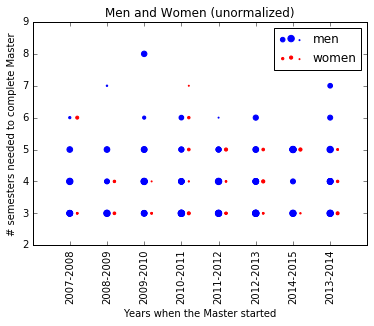

In [34]:
plt.figure()
plt.scatter(men.YearStarted, men.length, s=sizes_men, color='b', label='men')
plt.scatter(women.YearStarted+0.2, women.length, s=sizes_women, color='r', label='women')
plt.xlabel('Years when the Master started')
plt.ylabel('# semesters needed to complete Master')
plt.xticks(val, years, rotation='vertical')
plt.legend()
plt.title('Men and Women (unormalized)')
plt.show() 

[  42.85714286   14.28571429   42.85714286   42.85714286   28.57142857
   14.28571429   85.71428571   28.57142857   14.28571429   14.28571429
   14.28571429  142.85714286   42.85714286   14.28571429   42.85714286
   85.71428571   28.57142857   14.28571429  100.          128.57142857
   28.57142857   28.57142857]


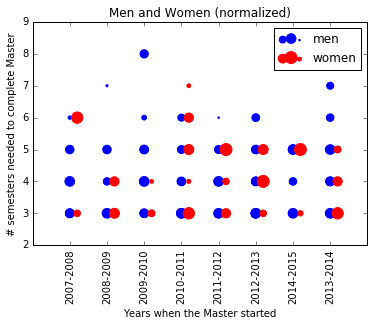

In [47]:
size = 500
sizes_men_normalized = 500*np.array(sizes_men/men.count()['length'])
sizes_women_normalized = 1000*np.array(sizes_women/women.count()['length'])

print(sizes_women_normalized)

plt.figure()
plt.scatter(men.YearStarted, men.length, s=sizes_men_normalized, color='b', label='men')
plt.scatter(women.YearStarted+0.2, women.length, s=sizes_women_normalized, color='r', label='women')
plt.xlabel('Years when the Master started')
plt.ylabel('# semesters needed to complete Master')
plt.xticks(val, years, rotation='vertical')
plt.legend()
plt.title('Men and Women (normalized)')
plt.show() 